In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.shape

(20800, 5)

In [4]:
df.dropna(inplace=True)
df.shape

(18285, 5)

In [5]:
df['label'].value_counts()

0    10361
1     7924
Name: label, dtype: int64

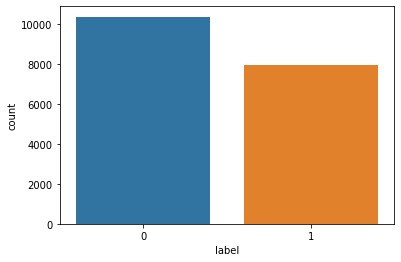

In [6]:
sns.countplot(x = df['label'] )

In [7]:
x = df.drop('label', axis=1)
y = df['label']
len(x), len(y)

(18285, 18285)

In [8]:
x[:5]

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [9]:
x.reset_index(inplace=True)
x[:5]

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [10]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
stop_words = stopwords.words('english')
ps = PorterStemmer()

corpus = []
for i in range(0, len(x)):
  reviews = re.sub('[^ a-zA-Z]', ' ', x.title[i])
  reviews = reviews.lower()
  reviews = reviews.split()

  reviews = [ps.stem(word) for word in reviews if word not in stop_words]
  reviews = " ".join(reviews)
  corpus.append(reviews)

corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [12]:
from keras import layers
from keras.layers import LSTM, Embedding, Bidirectional
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras import models

In [13]:
vocab_size = 6000

one_hot_corpus = [one_hot(review, vocab_size) for review in corpus]
one_hot_corpus

[[5782, 2525, 5023, 3642, 2627, 5604, 3005, 1672, 4154, 2216],
 [5442, 2116, 3955, 4393, 4165, 751, 4179],
 [5985, 1961, 4600, 2845],
 [380, 1159, 2405, 3115, 5360, 5091],
 [708, 4165, 4859, 2497, 2667, 1756, 4165, 5670, 5370, 4649],
 [1634,
  5841,
  2032,
  5448,
  1785,
  1269,
  4801,
  1035,
  5631,
  982,
  5446,
  2090,
  4425,
  6,
  4179],
 [3104, 3358, 5704, 2500, 1114, 5448, 5151, 4646, 5895, 5618, 1382],
 [5013, 4972, 2994, 2283, 330, 5938, 1269, 3623, 5895, 5618, 1382],
 [197, 1232, 4308, 4327, 1910, 5431, 193, 2183, 1269, 3782],
 [1411, 1303, 3276, 1772, 4197, 3265, 2429, 2630],
 [3152, 2604, 1795, 5028, 1231, 407, 2709, 297, 3215, 1432, 1331],
 [3115, 1198, 2627, 5431, 1269, 330],
 [5904, 823, 571, 5024, 779, 5242, 386, 1655, 430],
 [3494, 1866, 621, 4625, 1725, 3237, 2070, 5895, 5618, 1382],
 [5515, 1121, 4855, 2965, 4385, 5895, 5618, 1382],
 [4157, 2172, 5829, 3784, 1198, 939, 1147, 4909, 3176, 4718],
 [1797, 1325, 2116],
 [680, 4956, 1063, 288, 1269, 3954, 4597, 4179]

In [14]:
leng = []

for j in one_hot_corpus:
  leng.append(len(j))

max(leng)

47

In [15]:
max_length = 47

padded_corpus = pad_sequences(one_hot_corpus, padding='post', maxlen=max_length)
padded_corpus

array([[5782, 2525, 5023, ...,    0,    0,    0],
       [5442, 2116, 3955, ...,    0,    0,    0],
       [5985, 1961, 4600, ...,    0,    0,    0],
       ...,
       [5194,  878,  507, ...,    0,    0,    0],
       [ 411,  330,  113, ...,    0,    0,    0],
       [5066, 3950, 3107, ...,    0,    0,    0]], dtype=int32)

In [16]:
feature_size = 8

model = models.Sequential()
model.add(Embedding(vocab_size, feature_size, input_length=max_length))
model.add(layers.Dropout(0.2))
model.add(Bidirectional(LSTM(units=100)))
model.add(layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 47, 8)             48000     
_________________________________________________________________
dropout (Dropout)            (None, 47, 8)             0         
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               87200     
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 135,401
Trainable params: 135,401
Non-trainable params: 0
_________________________________________________________________


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(padded_corpus, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42
                                                    )
x_train.shape, y_train.shape

((13713, 47), (13713,))

In [18]:
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['acc']
    )

model_history = model.fit(
    x_train, 
    y_train, 
    validation_data=(x_test, y_test), 
    batch_size=64, 
    epochs=10
    )

Epoch 1/10
215/215 [==============================] - 22s 88ms/step - loss: 0.5210 - acc: 0.7033 - val_loss: 0.2200 - val_acc: 0.9092
Epoch 2/10
215/215 [==============================] - 17s 81ms/step - loss: 0.1674 - acc: 0.9347 - val_loss: 0.2338 - val_acc: 0.9175
Epoch 3/10
215/215 [==============================] - 18s 82ms/step - loss: 0.1174 - acc: 0.9573 - val_loss: 0.2263 - val_acc: 0.9079
Epoch 4/10
215/215 [==============================] - 17s 80ms/step - loss: 0.1171 - acc: 0.9560 - val_loss: 0.2272 - val_acc: 0.9090
Epoch 5/10
215/215 [==============================] - 17s 81ms/step - loss: 0.0812 - acc: 0.9711 - val_loss: 0.2557 - val_acc: 0.9070
Epoch 6/10
215/215 [==============================] - 17s 81ms/step - loss: 0.0689 - acc: 0.9764 - val_loss: 0.2814 - val_acc: 0.9062
Epoch 7/10
215/215 [==============================] - 17s 80ms/step - loss: 0.0546 - acc: 0.9823 - val_loss: 0.3127 - val_acc: 0.9031
Epoch 8/10
215/215 [==============================] - 17s 81ms

In [19]:
model.evaluate(x_test, y_test)

143/143 [==============================] - 2s 13ms/step - loss: 0.3517 - acc: 0.9029


[0.3517168462276459, 0.9028871655464172]

In [20]:
dr = pd.DataFrame(model_history.history)
dr[:5]

,loss,acc,val_loss,val_acc
0,0.366088,0.816743,0.220037,0.909230
1,0.159409,0.937213,0.233754,0.917542
2,0.122609,0.956027,0.226261,0.907918
3,0.116420,0.956756,0.227214,0.909011
4,0.089433,0.967476,0.255670,0.907043


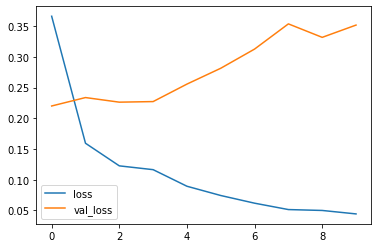

In [21]:
dr.loc[: , ['loss', 'val_loss']].plot()

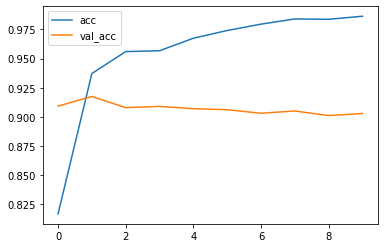

In [22]:
dr.loc[: , ['acc', 'val_acc']].plot()

In [23]:
y_pred = model.predict_classes(x_test)
y_pred[:5]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [0],
       [0],
       [0],
       [1]], dtype=int32)

Accuracy :  0.9028871391076115
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2600
           1       0.88      0.90      0.89      1972

    accuracy                           0.90      4572
   macro avg       0.90      0.90      0.90      4572
weighted avg       0.90      0.90      0.90      4572



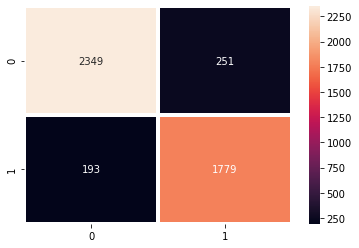

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, lw=3, fmt='d')

print('Accuracy : ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))